In [1]:
# The code was removed by DSX for sharing.

Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
1459,"January, 2015",29,Spain,ads,4,0
12474,"January, 2015",49,France,ads,5,0
12294,"January, 2015",49,Germany,ads,2,0
3878,"January, 2015",49,China,ads,1,0
9567,"January, 2015",49,UK,ads,5,0
790,"January, 2015",49,US,ads,3,0


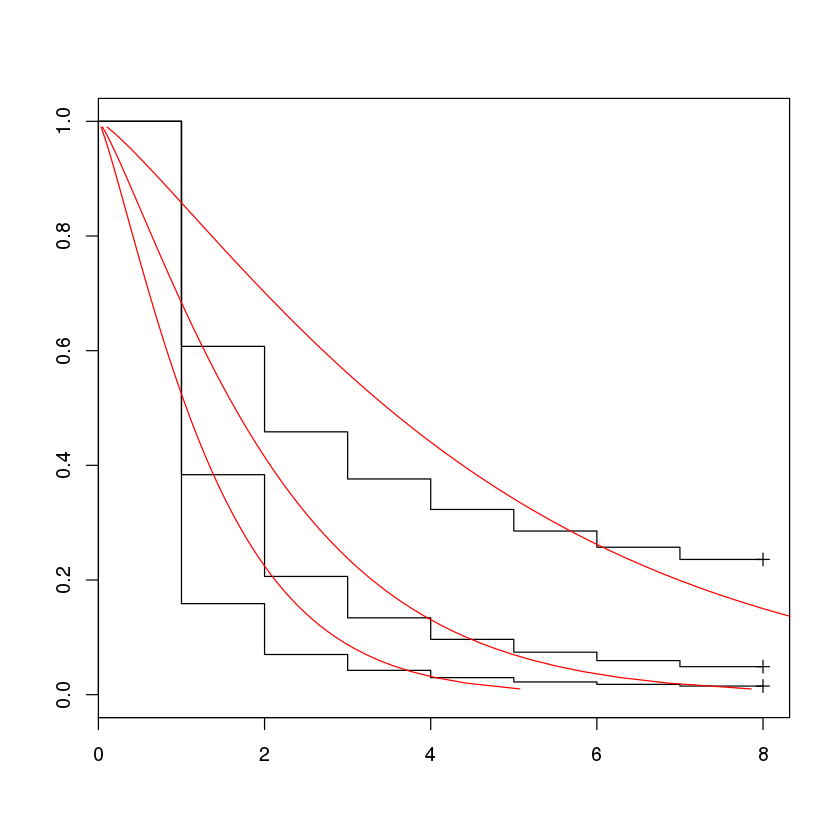

In [2]:
library(survival)

attach(df.data.1)
time=billing_cycles
status=1-is_active


s <- with(df.data.1,Surv(time,status))

fKM <- survfit(s ~ factor(subscription_monthly_cost),data=df.data.1)
#fKM <- survfit(s ~ 1,data=data)
plot(fKM)

#plot weibull survival curves
sWei <- survreg(s ~ factor(subscription_monthly_cost),dist='weibull',data=df.data.1)
#sWei <- survreg(s ~ 1,dist='exponential',data=data1)


lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=29),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")
lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=49),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")
lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=99),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")


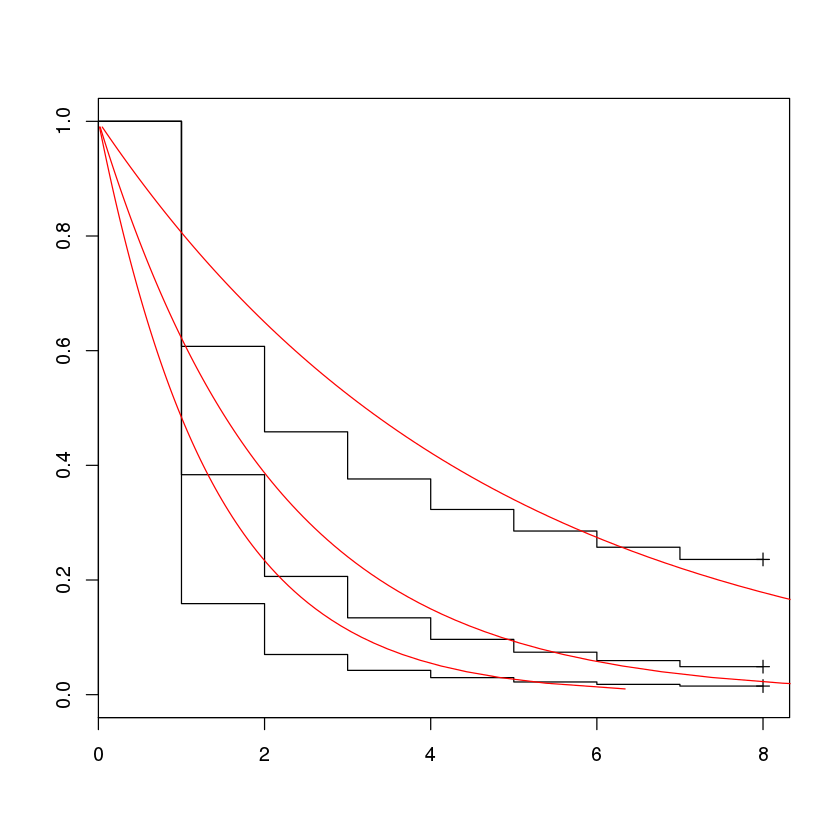

In [3]:
fKM <- survfit(s ~ factor(subscription_monthly_cost),data=df.data.1)
plot(fKM)

#plot weibull survival curves
sWei <- survreg(s ~ factor(subscription_monthly_cost),dist='exponential',data=df.data.1)

lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=29),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")
lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=49),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")
lines(predict(sWei, newdata=data.frame(subscription_monthly_cost=99),type="quantile",p=seq(.01,.99,by=.01)),seq(.99,.01,by=-.01),col="red")

In [4]:
df.data.3 <-  read.csv(file = getObjectStorageFileWithCredentials_8f8071a3ce1746d89c1630604ac3201f("Subscription", "maps.csv"))
head(df.data.3)

country,revenue_Sum,Record_Count,revenue.last.month_Sum,Record_Count.last.month,Latitude,Longitude
China,4324828,35938,2526736,10618,32.32753,104.163570
France,4349689,51662,720664,2567,46.62172,2.449921
Germany,9892101,88944,2402488,6979,50.54206,10.065929
India,5371074,48027,2617896,10843,19.55143,82.788415
Italy,3944486,47459,652712,2311,42.79454,12.573585
Spain,3731829,44987,613424,2182,40.06960,-2.988615


In [ ]:
df.data.3$Longitude[8]<- -83
#data$Latitude[8]<- 

require(ggmap);require(stringr)
map <- get_map(location = c(lon = 0, lat = 2), zoom =2, maptype =  "toner-lite")

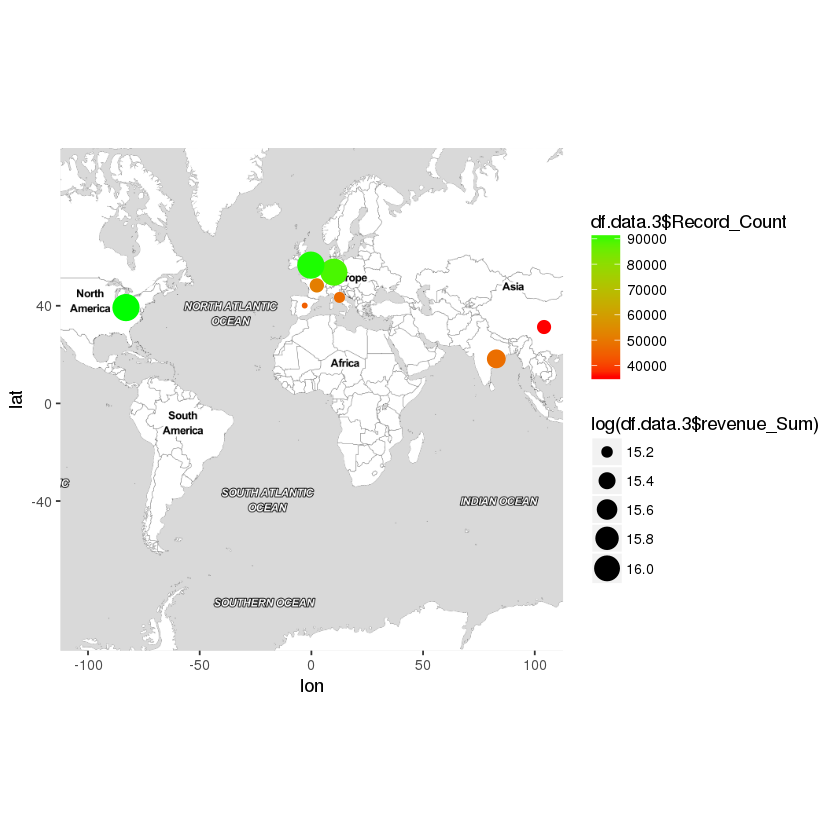

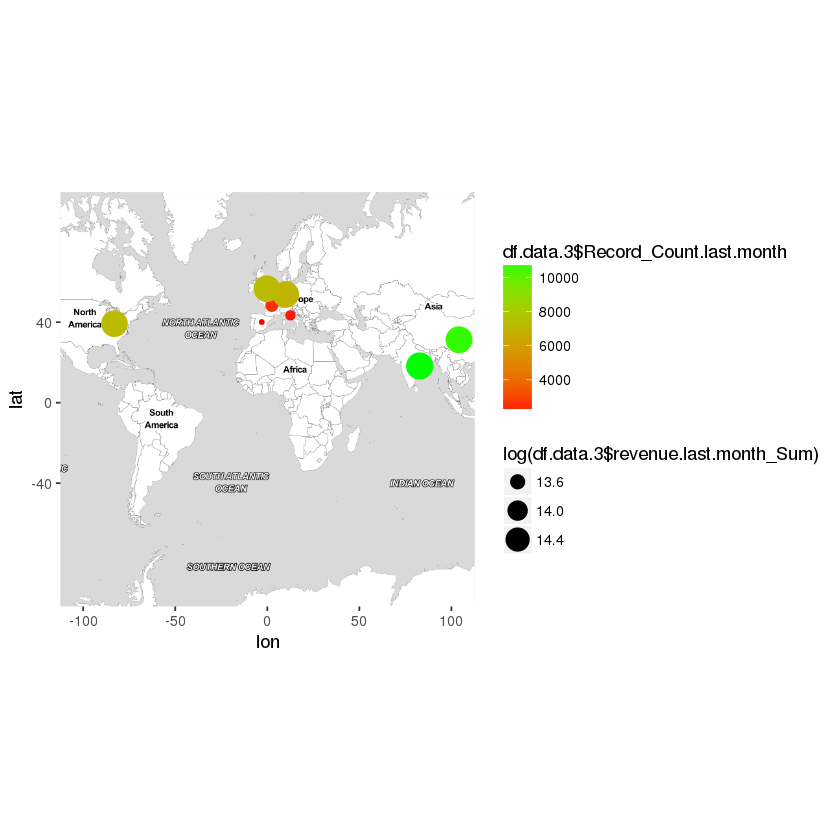

In [10]:
ggmap(map)+geom_point(aes(df.data.3$Longitude, df.data.3$Latitude,colour = df.data.3$Record_Count, size = log(df.data.3$revenue_Sum)),data=df.data.3)+scale_size_continuous(range = c(1,7))+scale_colour_gradient(low = "red",high = "green")
#get_map(location = c(lon = -95.3632715, lat = 29.7632836), zoom = "auto", scale = "auto", maptype = c("satellite"), force = ifelse(source == "google", TRUE, TRUE), messaging = FALSE, urlonly = FALSE, filename = "ggmapTemp", crop = TRUE, color = c("color", "bw"))
ggmap(map)+geom_point(aes(df.data.3$Longitude, df.data.3$Latitude,colour = df.data.3$Record_Count.last.month, size = log(df.data.3$revenue.last.month_Sum)),data=df.data.3)+scale_size_continuous(range = c(1,7))+scale_colour_gradient(low = "red",high = "green")
